<p>Statistical learning refers to a collection
of mathematical and computation tools to understand data.
In what is often called supervised learning,
the goal is to estimate or predict an output based on one or more inputs.
The inputs have many names, like predictors, independent variables,
features, and variables being called common.
The output or outputs are often called response variables,
or dependent variables.
If the response is quantitative-- say, a number that measures weight or height,
we call these problems regression problems.
If the response is qualitative-- say, yes or no, or blue or green,
we call these problems classification problems.
This case study deals with one specific approach to classification. <br>
The goal is to set up a classifier such that when
it's presented with a new observation whose category is not known,
it will attempt to assign that observation to a category, or a class,
based on the observations for which it does know the true category.
This specific method is known as the k-Nearest Neighbors classifier,
or kNN for short. <br>
Given a positive integer k, say 5, and a new data point,
it first identifies those k points in the data that are nearest to the point
and classifies the new data point as belonging to the most common class
among those k neighbors.</p>

In [1]:
import numpy as np

# Euclidean distance between two points expressed as NumPy arrays
point1 = np.array([1,1])
point2 = np.array([5,5])

np.sqrt(np.sum(np.power(point2 - point1, 2)))

5.656854249492381

In [2]:
def distance(p1, p2):
    '''
    input : np.array(), np.array
    Finds the distance between points p1 and p2.
    Returns distance.
    '''
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

In [3]:
from collections import Counter

votes = [1,2,3,1,2,5]
# Majority Vote
def majority_vote_1(votes):
    return Counter(votes)
r = majority_vote(votes)
max(r, key=r.get)

NameError: name 'majority_vote' is not defined

In [4]:
import scipy.stats as sp

def majority_vote_2(votes):
    mode, count = sp.mstats.mode(votes)
    return mode, count
majority_vote_2(votes)

(array([1.]), array([2.]))

In [10]:
import random

# Will use this method as it can handle multiple max votes and return a random result
def majority_vote(votes):
    votecounter = Counter(votes)
    maxvote = max(votecounter.values())
    winners = [vote for vote, count in votecounter.items() if count == maxvote]
    return random.choice(winners)
print(majority_vote(votes))
print(majority_vote(votes))

1
2


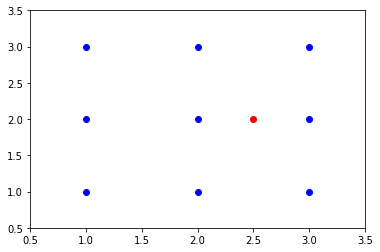

In [11]:
import matplotlib.pyplot as plt

points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

plt.plot(points[:,0], points[:,1], "bo")
plt.plot(p[0], p[1], "ro")
plt.axis([.5, 3.5, .5 ,3.5])
plt.show()

In [12]:
# calculate the distance between a point p and each of the points in array points.
distances = np.array([distance(p, points[i]) for i in range(points.shape[0])])
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [13]:
# Perform an indirect sort along the given axis using the algorithm specified by the kind keyword.
# It returns an array of indices of the same shape as a that index data along the given axis in sorted order.
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [14]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [15]:
# selecting the neareast k neareast element [0:k]
distances[ind[0:2]]

array([0.5, 0.5])

In [16]:
def find_nearest_neighbours(p, points, k=5):
    '''
    Find the k nearest neighbors of point p and return their indices. 
    '''
    distances = np.array([distance(p, points[i]) for i in range(points.shape[0])])
    ind = np.argsort(distances)
    return ind[:k]
points[find_nearest_neighbours(p, points, 2)]

array([[2, 2],
       [3, 2]])

In [17]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbours(p, points, k)
    return majority_vote(outcomes[ind])

# class 0,1
outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([2.5,2.7]), points, outcomes, 2)

1

In [18]:
knn_predict(np.array([1.,2.7]), points, outcomes, 2)

0

In [32]:
# Generating synthetic data
class0 = sp.norm(0,1).rvs((5,2))
class1 = sp.norm(1,1).rvs((5,2))
np.concatenate((class0, class1), axis=0)

array([[-0.70061982, -0.69115391],
       [ 0.77449928,  1.08694317],
       [-1.89818641, -0.07960761],
       [-0.84717009, -0.17767503],
       [-0.68443373,  0.57173636],
       [ 0.19413059,  1.52706571],
       [ 1.30855111,  0.48583639],
       [ 1.49686361,  2.20572893],
       [ 1.83336297, -0.92473655],
       [ 0.27801779, -1.22421443]])

In [39]:
# To turn this into a function, we want to be
# able to specify the number of rows in our synthetic data set.
def generate_synthetic_data(n=50):
    '''Create two sets of points from bivariate normal distributions.'''
    points = np.concatenate((sp.norm(0,1).rvs((n,2)), sp.norm(1,1).rvs((n,2))), axis=0)
    # Generate the outcome vector
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

generate_synthetic_data(3)

(array([[-0.00796293,  0.88472041],
        [-1.11374059, -0.65550476],
        [ 0.90388037, -0.27065036],
        [ 0.85939803,  2.01442303],
        [ 3.50154355,  0.48705734],
        [ 1.61752084,  2.50210259]]), array([0, 0, 0, 1, 1, 1]))

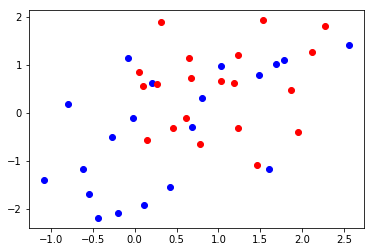

In [46]:
n = 20
(points, outcomes) = generate_synthetic_data(n)
plt.figure()
plt.plot(points[:n,0], points[:n,1], "bo")
plt.plot(points[n:,0], points[n:,1], "ro")
plt.savefig("bivariate_data.pdf")
plt.show()

In [65]:
def make_prediction_grid(preictors, outcomes, limits, h, k):
    '''Classify each point on the prediction grid.'''
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    return plt

In [85]:
(predictors, outcomes) = generate_synthetic_data()
predictors.shape, outcomes.shape

((100, 2), (100,))

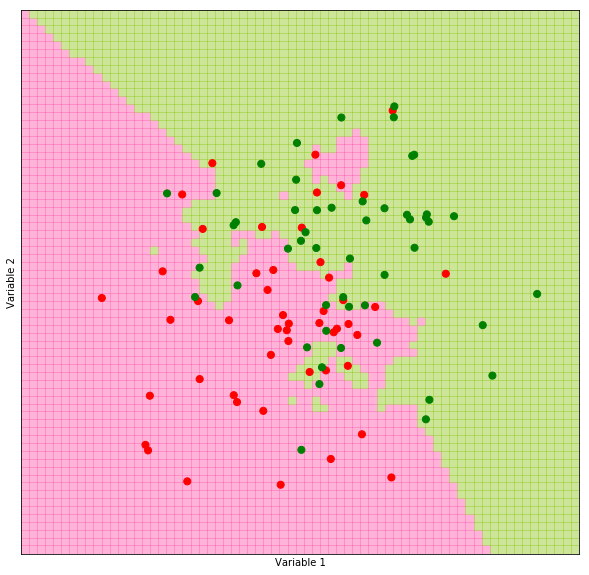

In [86]:
k = 5; filename = "knn_synth_5.pdf"; limits = (-3,4,-3,4); h = .1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

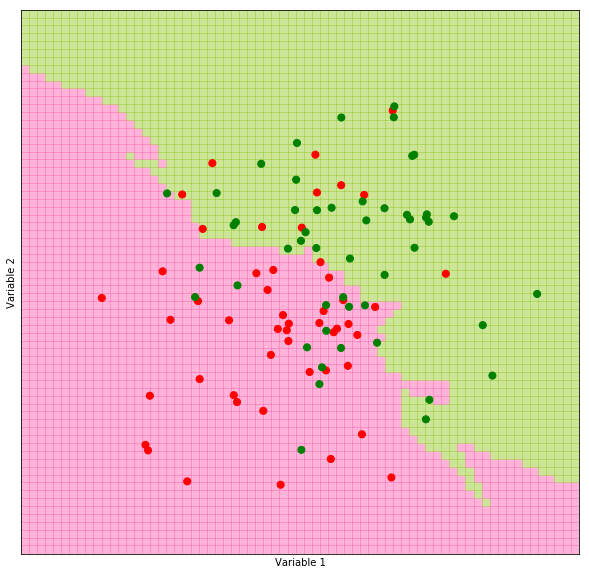

In [87]:
k = 25; filename = "knn_synth_25.pdf"; limits = (-3,4,-3,4); h = .1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

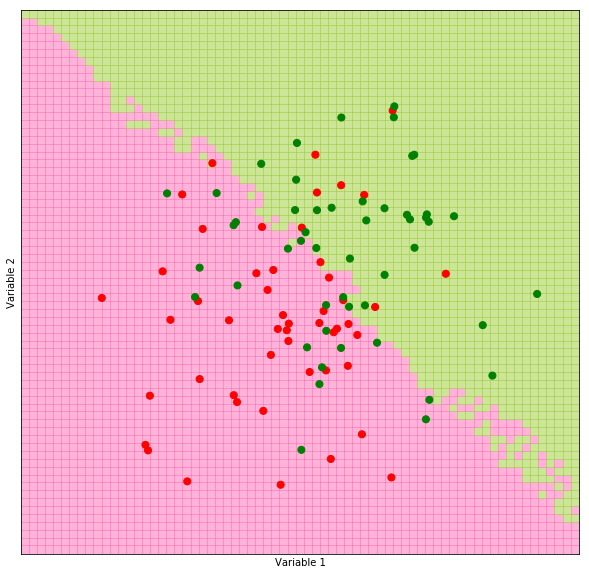

In [88]:
k = 50; filename = "knn_synth_50.pdf"; limits = (-3,4,-3,4); h = .1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

<p>It turns out that using a value for k that's too large or too small
is not optimal.
A phenomenon that is known as the bias-variance tradeoff.
This suggests that some intermediate values of k might be best.</p>

<h2>SciKitLearn</h2>
<p>SciKitLearn is an open source machine learning library for Python.
It's a very extensive library.
Here, we will only make use of its knn classifier.
But there is much, much more there to explore.
We'll be applying both the SciKitLearn and our homemade classifier
to a classic data set created by Ron Fisher in 1933.
It consists of 150 different iris flowers.
50 from each of three different species.
For each flower, we have the following covariates: sepal length, sepal width,
petal length, and petal width.</p>

In [90]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [94]:
predictors = iris.data[:, 0:2]
predictors[0:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [96]:
outcomes = iris.target
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

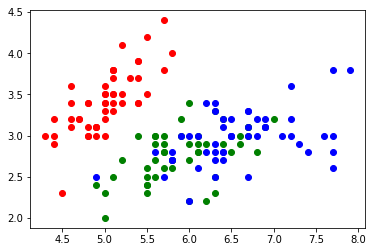

In [99]:
plt.plot(
    predictors[outcomes == 0][:, 0],
    predictors[outcomes == 0][:, 1],
    "ro"
        )
plt.plot(
    predictors[outcomes == 1][:, 0],
    predictors[outcomes == 1][:, 1],
    "go"
        )
plt.plot(
    predictors[outcomes == 2][:, 0],
    predictors[outcomes == 2][:, 1],
    "bo"
        )
plt.savefig("iris.pdf")
plt.show()

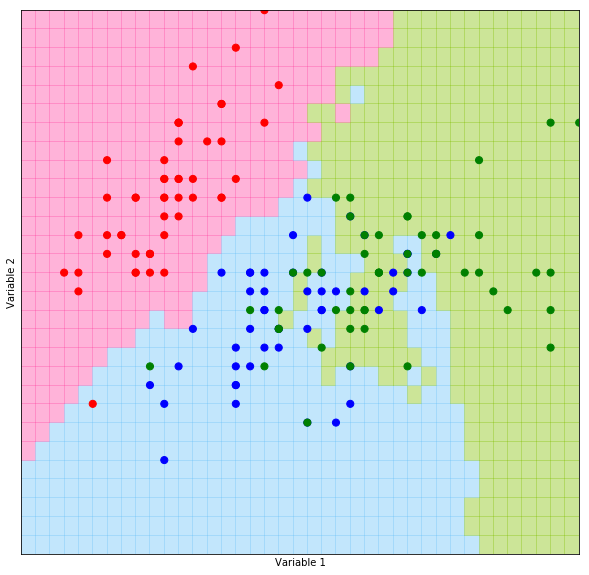

In [101]:
k = 5; filename = "iris_grid_5.pdf"; limits = (4,8,1.5,4.5); h = .1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [106]:
# Let's then fit the knn classifier using both the algorithm from SciKitLearn
# as well as our own homemade algorithm.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

# We have 150 observations in this array.
# This makes sense.
# We started with 150 observations belonging
# to one of the three different classes.
sk_predictions.shape

(150,)

In [108]:
# These correspond to their predictions provided by the SciKitLearn algorithm
# using KNearestNeighbors.
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [112]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])
my_predictions.shape

(150,)

In [115]:
# Compare my predictions with Sklearn Knn predictions 
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [123]:
# True will be evaluated as one and False as zero.
np.mean(sk_predictions == my_predictions) * 100

96.0

In [126]:
np.mean(sk_predictions == outcomes) * 100

83.33333333333334

In [128]:
np.mean(my_predictions == outcomes) * 100

84.66666666666667

<p>What we see is the following: <br>
Using SciKit, the actual observed outcomes for the data
points that we have observed, agree with the predictions of the SciKit library
83% of the time.
In this case, our homemade predicter is actually somewhat better.
We're correct approximately 85% of the time.</p>